# **EDAspy Test/Tutorial**
## Showing new functionalities and visualization module

In [1]:
from EDAspy.optimization import EGNA
from EDAspy.optimization import UMDAc
from EDAspy.benchmarks import ContinuousBenchmarkingCEC14
import pickle
import warnings
warnings.filterwarnings("ignore")

In [2]:
n_variables = 10
benchmarking = ContinuousBenchmarkingCEC14(n_variables)

In [3]:
execute_edas = True
if execute_edas:
    umda = UMDAc(size_gen=100, max_iter=300, dead_iter=50, n_variables=n_variables, lower_bound=-100, upper_bound=100)
    eda_resultumdaRAST = umda.minimize(benchmarking.cec14_9, True) #Rastringin's function 9

IT:  0 	Best cost:  1026.9131592349743
IT:  1 	Best cost:  1026.0316181780793
IT:  2 	Best cost:  981.8530648466652
IT:  3 	Best cost:  980.7697542720811
IT:  4 	Best cost:  980.6482943993774
IT:  5 	Best cost:  944.9072701839536
IT:  6 	Best cost:  944.9072701839536
IT:  7 	Best cost:  944.9072701839536
IT:  8 	Best cost:  944.9072701839536
IT:  9 	Best cost:  944.9072701839536
IT:  10 	Best cost:  943.0848999330918
IT:  11 	Best cost:  943.0848999330918
IT:  12 	Best cost:  943.0848999330918
IT:  13 	Best cost:  943.0848999330918
IT:  14 	Best cost:  943.0848999330918
IT:  15 	Best cost:  943.0848999330918
IT:  16 	Best cost:  943.0848999330918
IT:  17 	Best cost:  943.0848999330918
IT:  18 	Best cost:  943.0848999330918
IT:  19 	Best cost:  943.0848999330918
IT:  20 	Best cost:  943.0848999330918
IT:  21 	Best cost:  943.0848999330918
IT:  22 	Best cost:  943.0848999330918
IT:  23 	Best cost:  943.0848999330918
IT:  24 	Best cost:  943.0848999330918
IT:  25 	Best cost:  943.08489993

In [4]:
import EDAspy.visualization as Vis

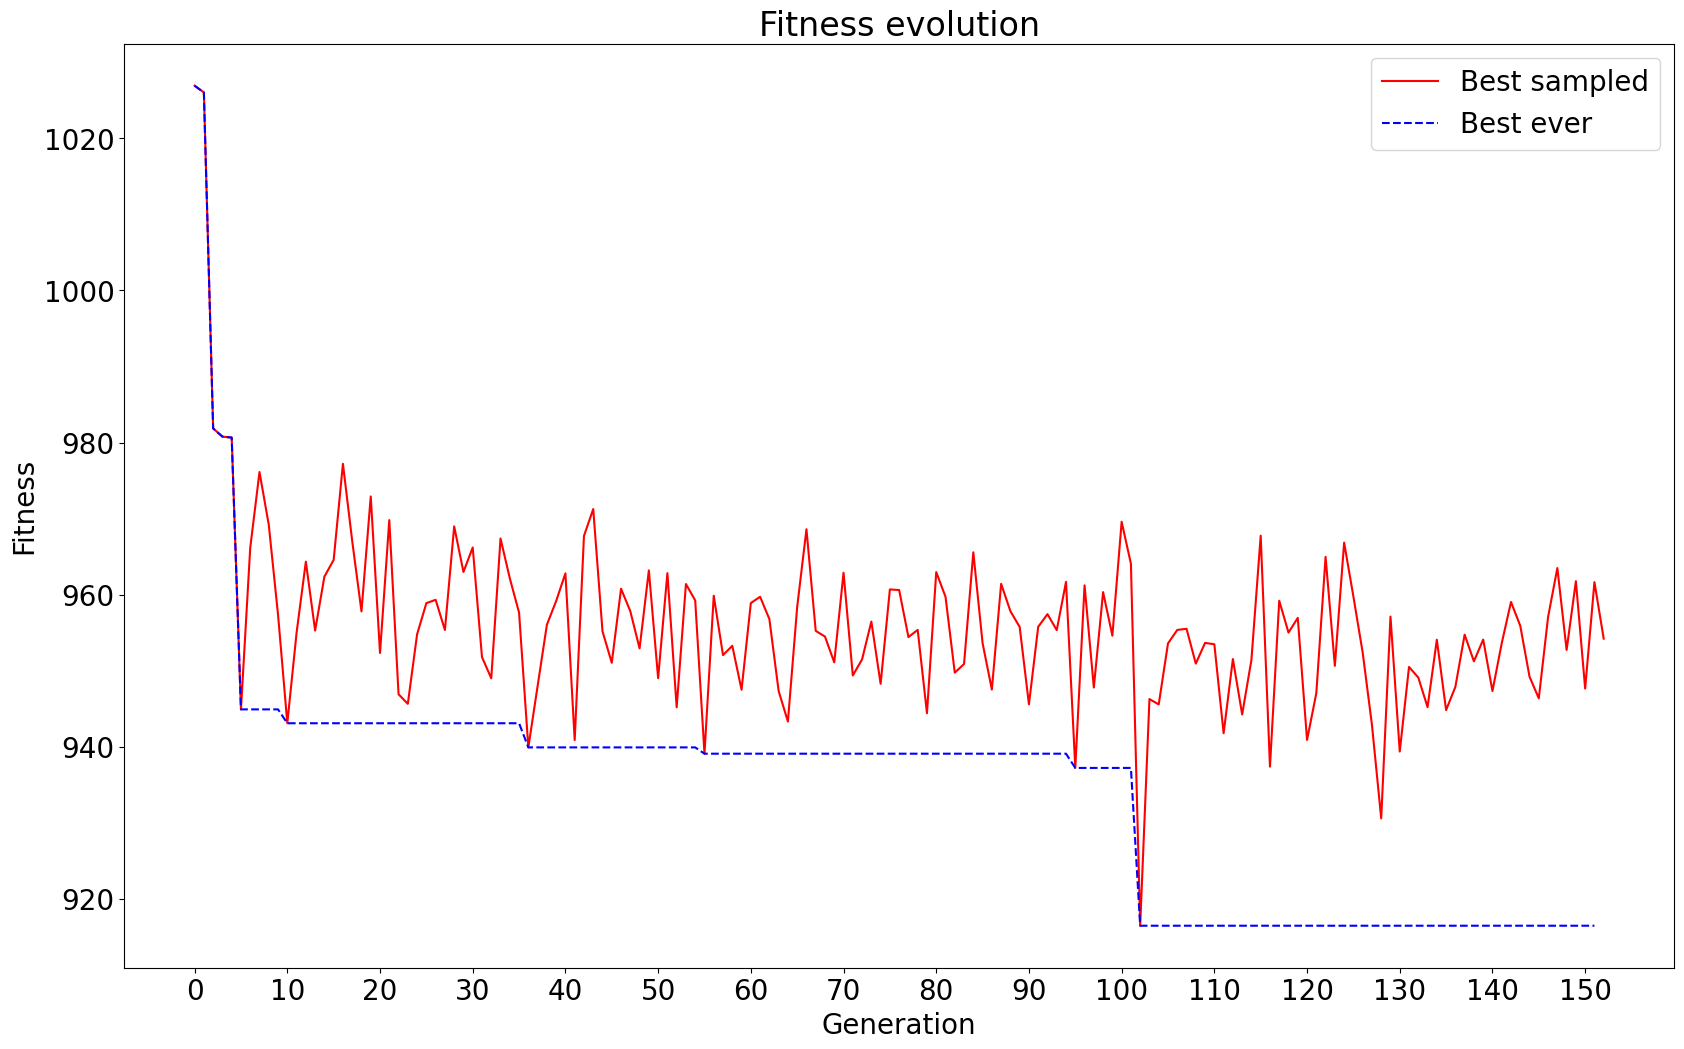

In [5]:
Vis.fitness_evolution(eda_resultumdaRAST)

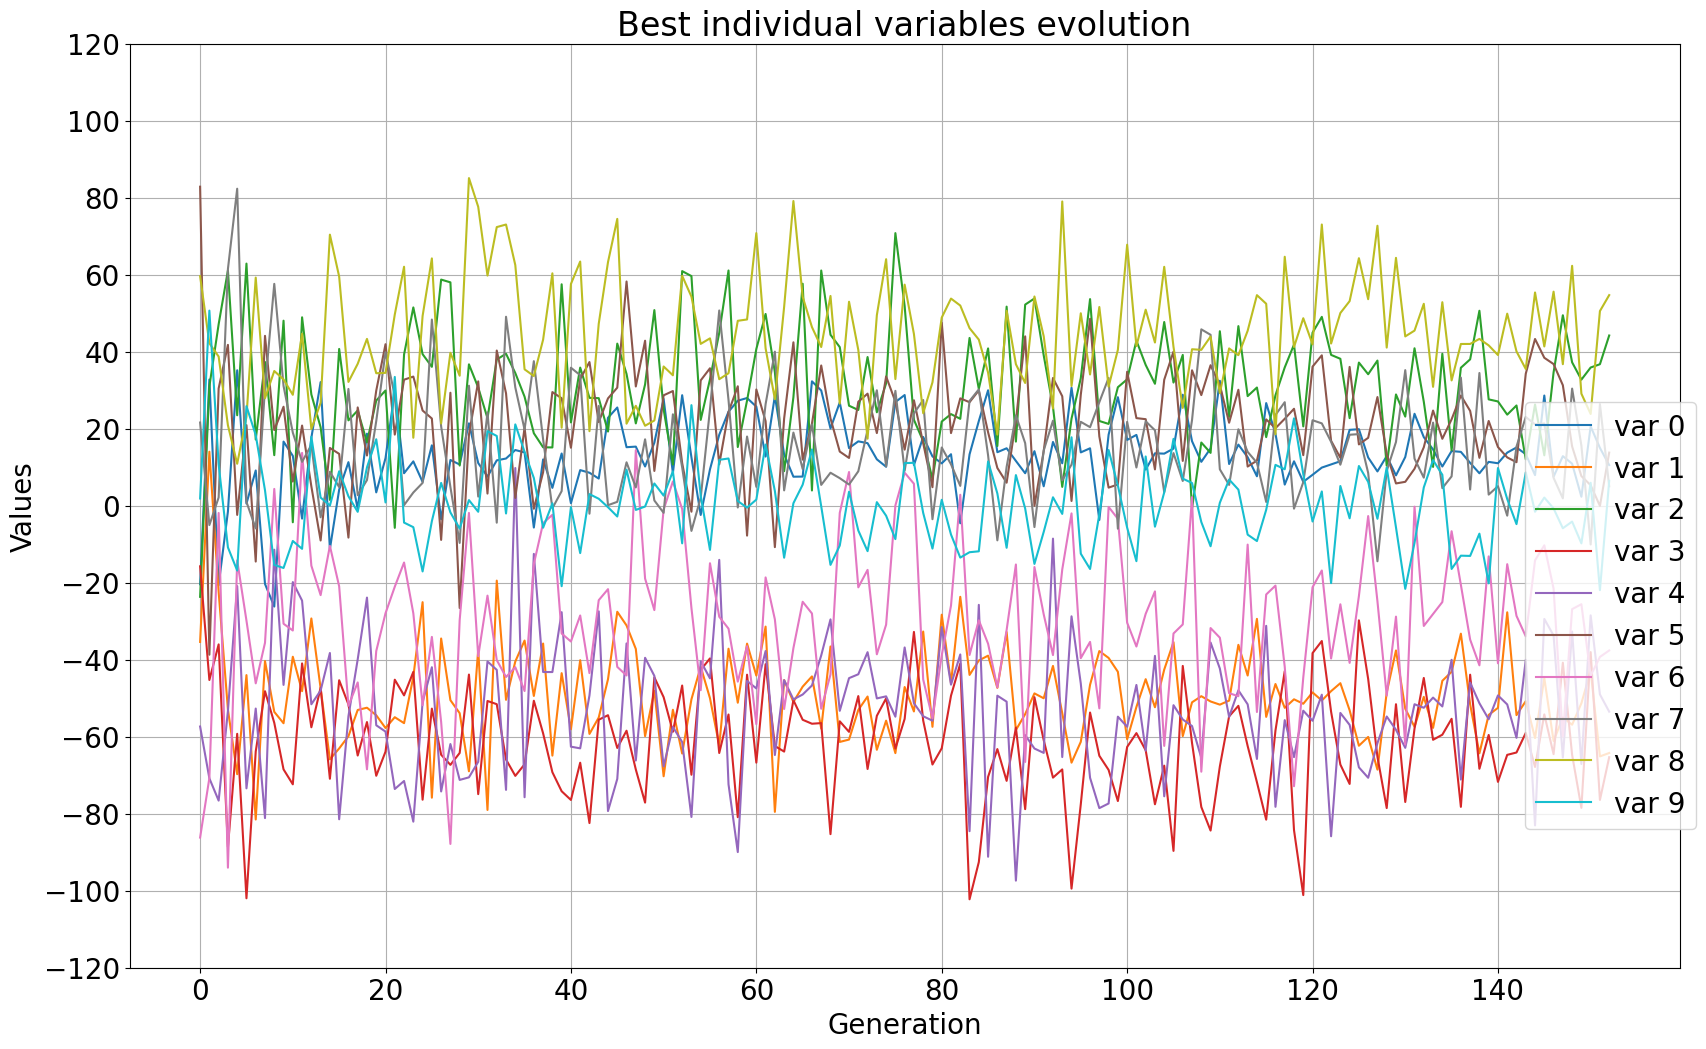

In [6]:
Vis.best_ind_var_ev(eda_resultumdaRAST)

['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9']


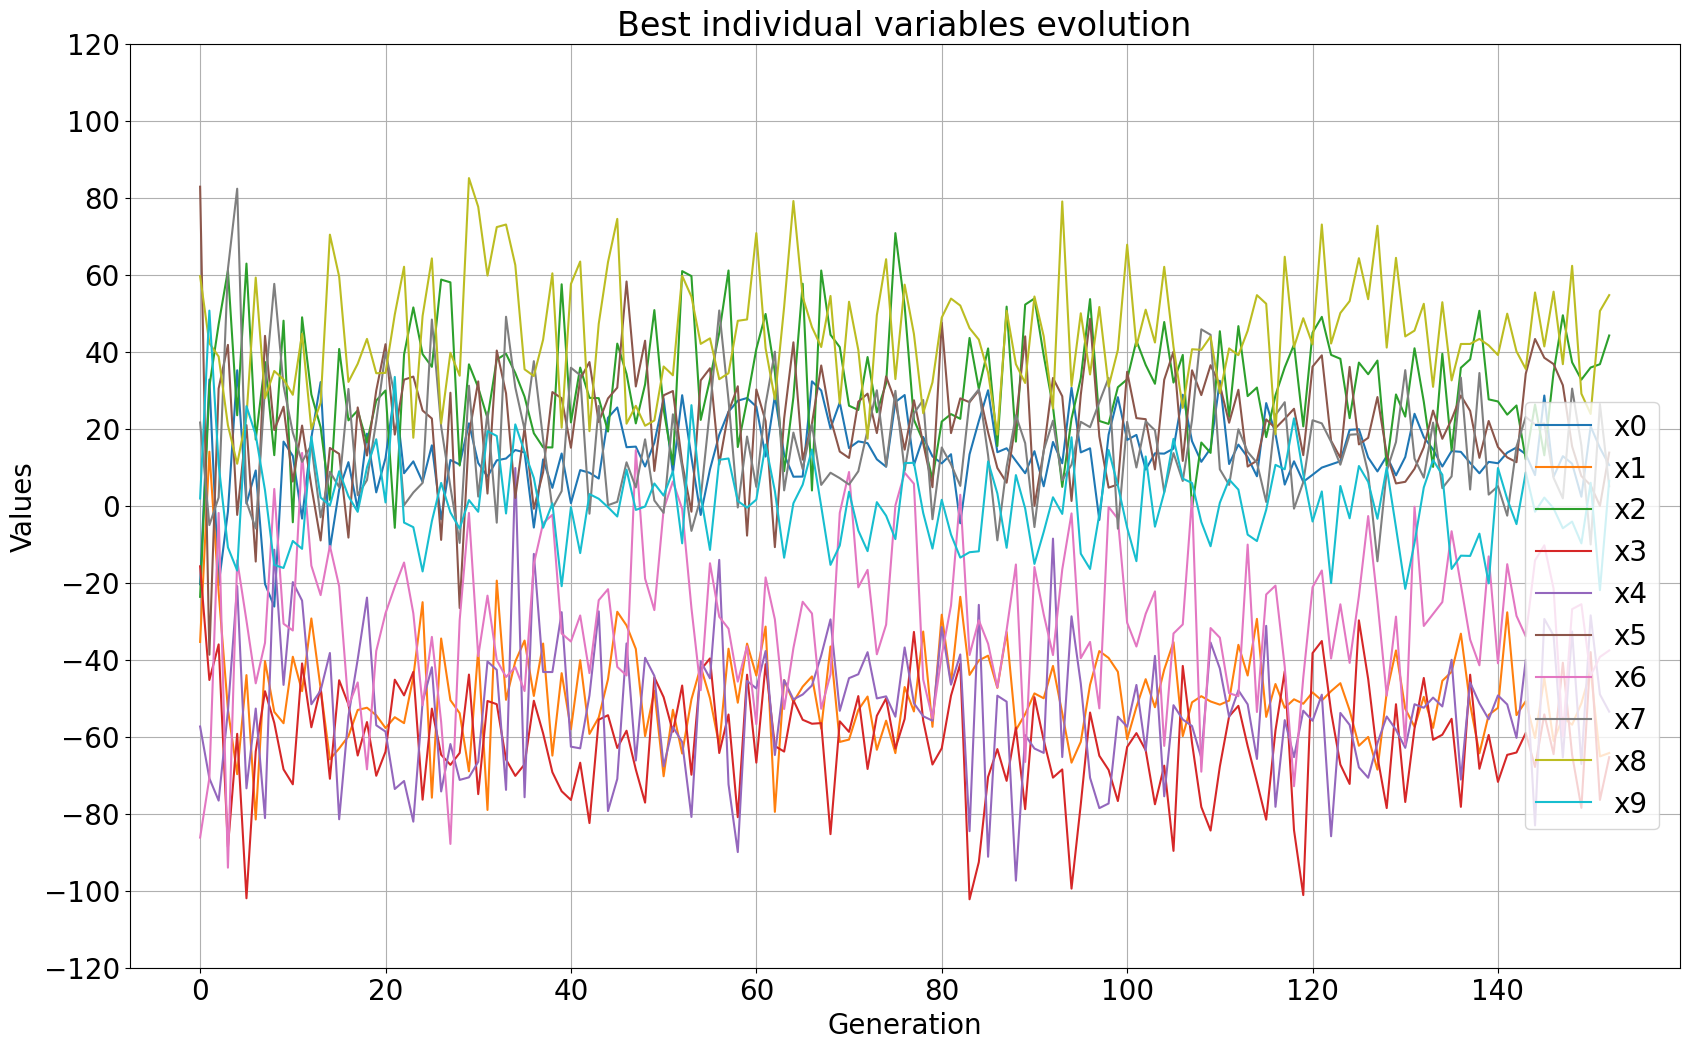

In [7]:
### CAN ADD LIST WITH VARIABLE NAMES, SAME ORDER AS PASSED TO EDA
variables=[f'x{i}' for i in range(0,10)]
print(variables)
Vis.best_ind_var_ev(eda_resultumdaRAST, variables_list=variables)

In [8]:
Vis.parall_coord(eda_resultumdaRAST, variables_list=variables)

interactive(children=(IntSlider(value=0, description='Generation', layout=Layout(width='100%'), max=151), Outp…

Text(value='', description='Save Loc:', layout=Layout(width='50%'), placeholder='Enter save location here...')

Button(description='Save Plot', style=ButtonStyle())

In [9]:
Vis.violin_plot(eda_resultumdaRAST, superimpose_sampled_individuals=True, variables_list=variables)

interactive(children=(IntSlider(value=0, description='Generation', layout=Layout(width='100%'), max=151), Outp…

Text(value='', description='Save Loc:', layout=Layout(width='50%'), placeholder='Enter save location here...')

Button(description='Save Plot', style=ButtonStyle())

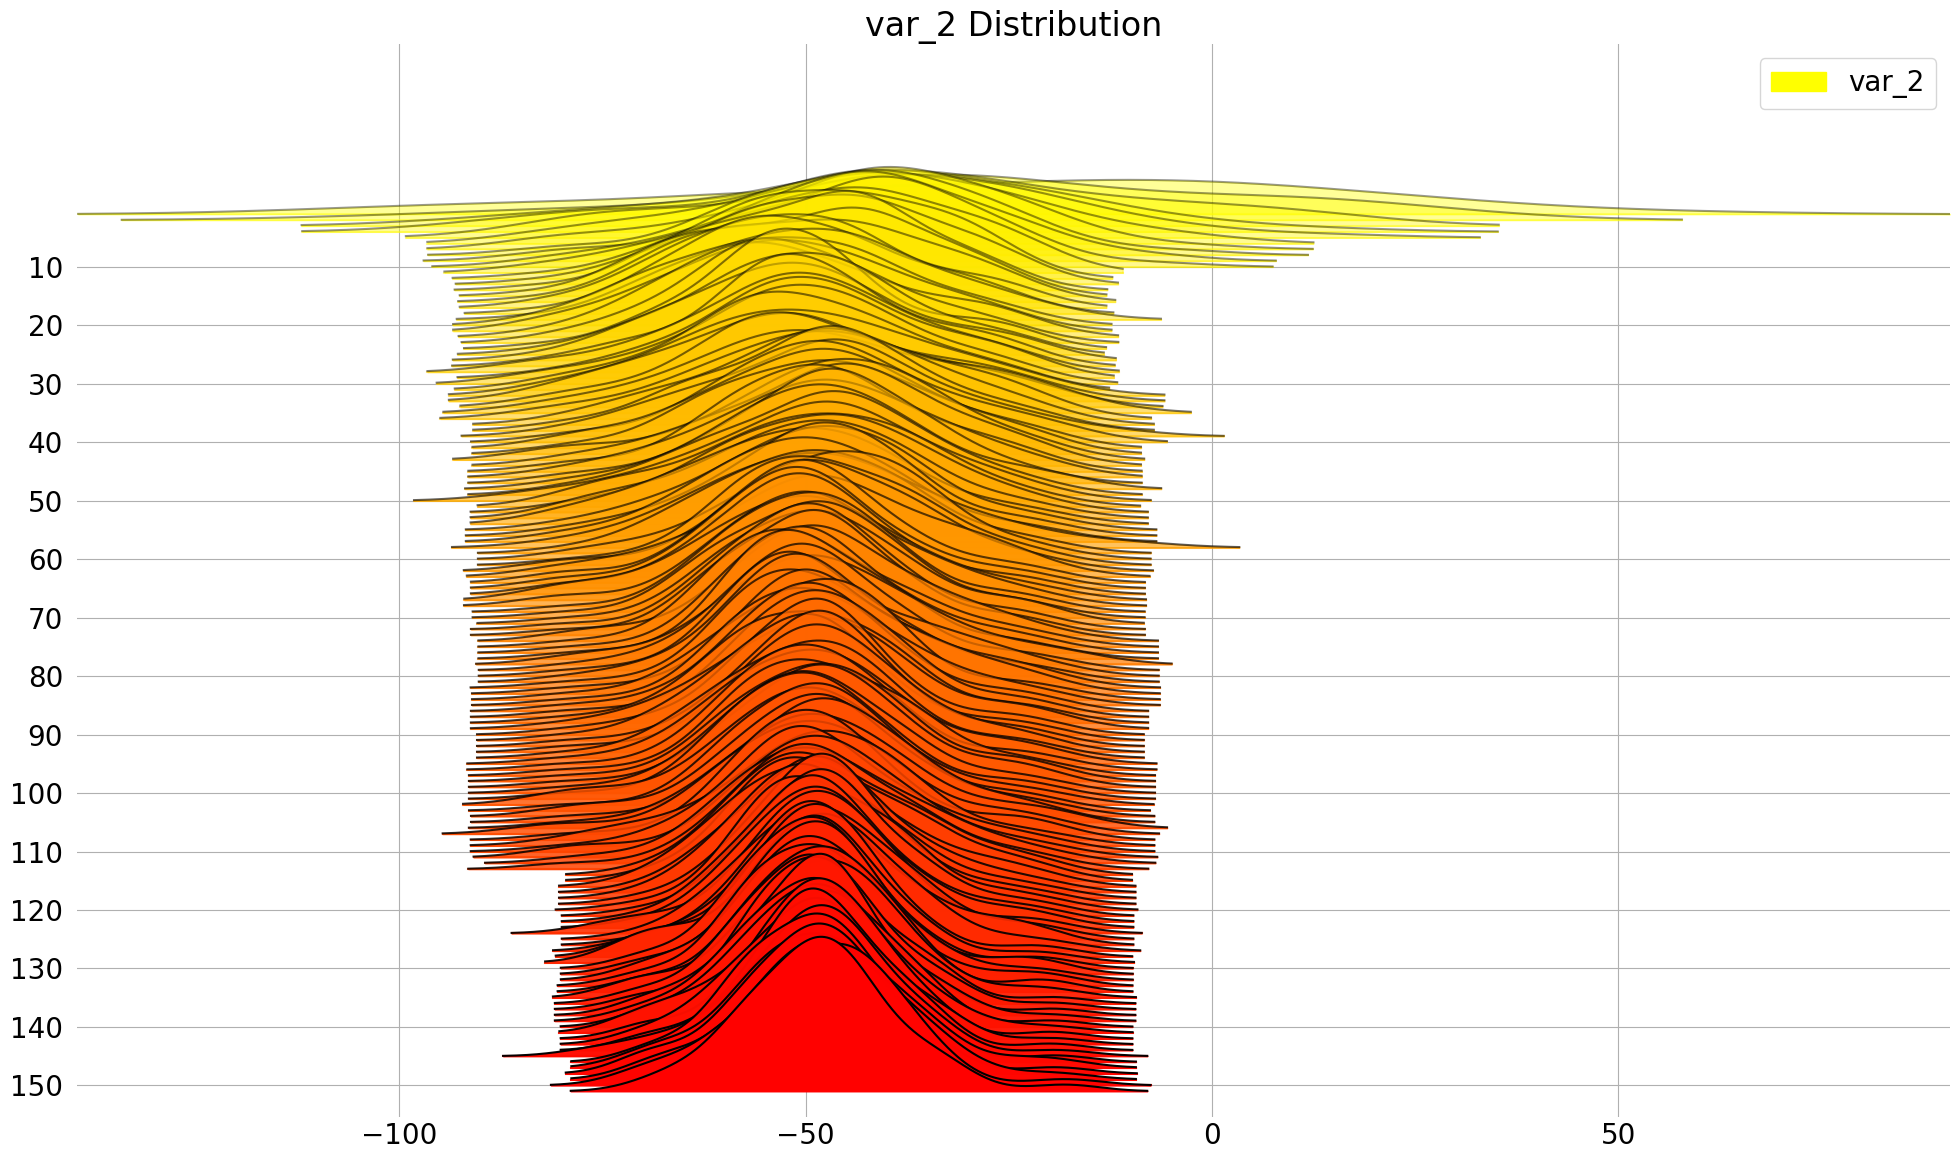

In [10]:
Vis.ridge_plot(eda_resultumdaRAST, vars_to_plot=['var_2'], overlap=1.8, kind='kde')

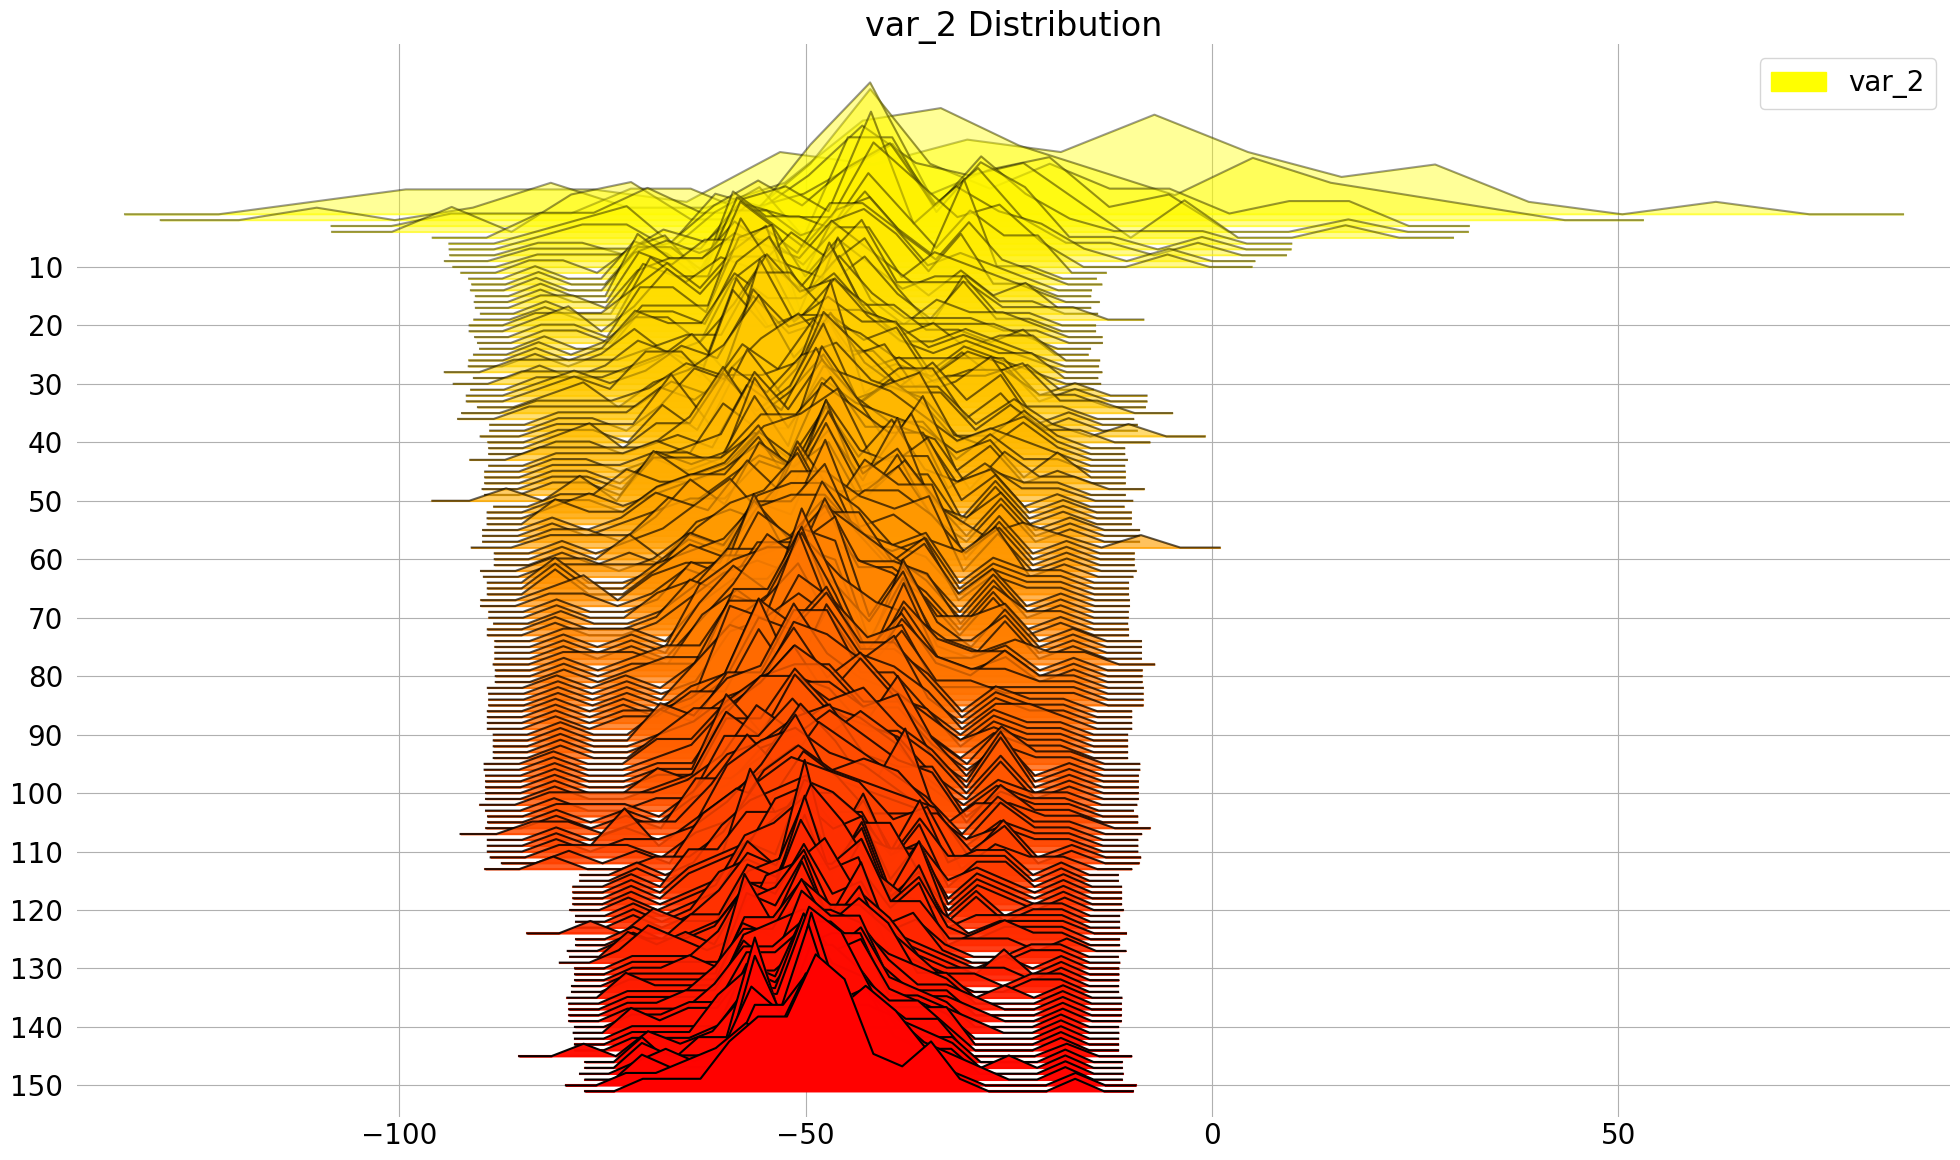

In [11]:
Vis.ridge_plot(eda_resultumdaRAST, vars_to_plot=['var_2'], overlap=1.8, kind='counts', bins=20)

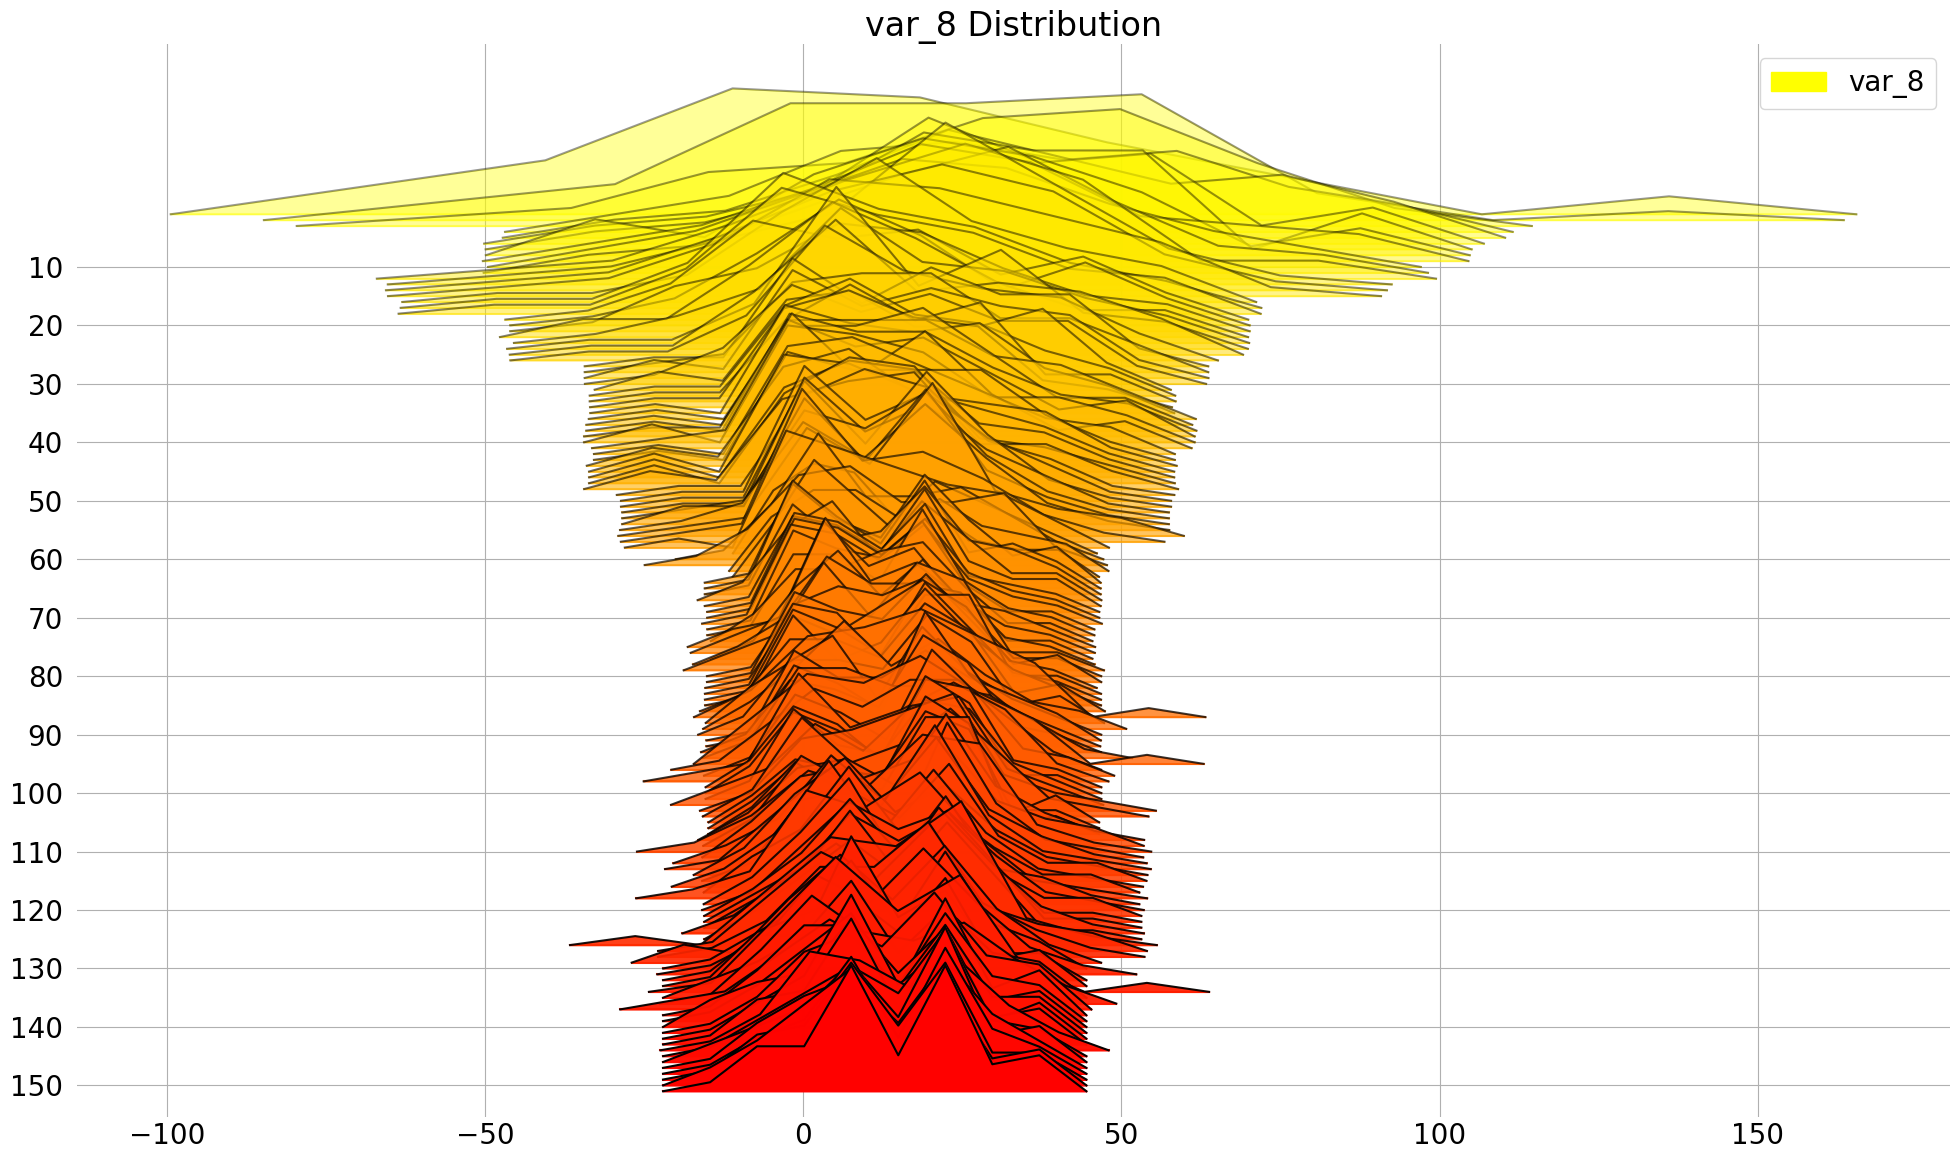

In [12]:
Vis.ridge_plot(eda_resultumdaRAST, vars_to_plot=['var_8'], overlap=1.8, kind='counts', bins=10)

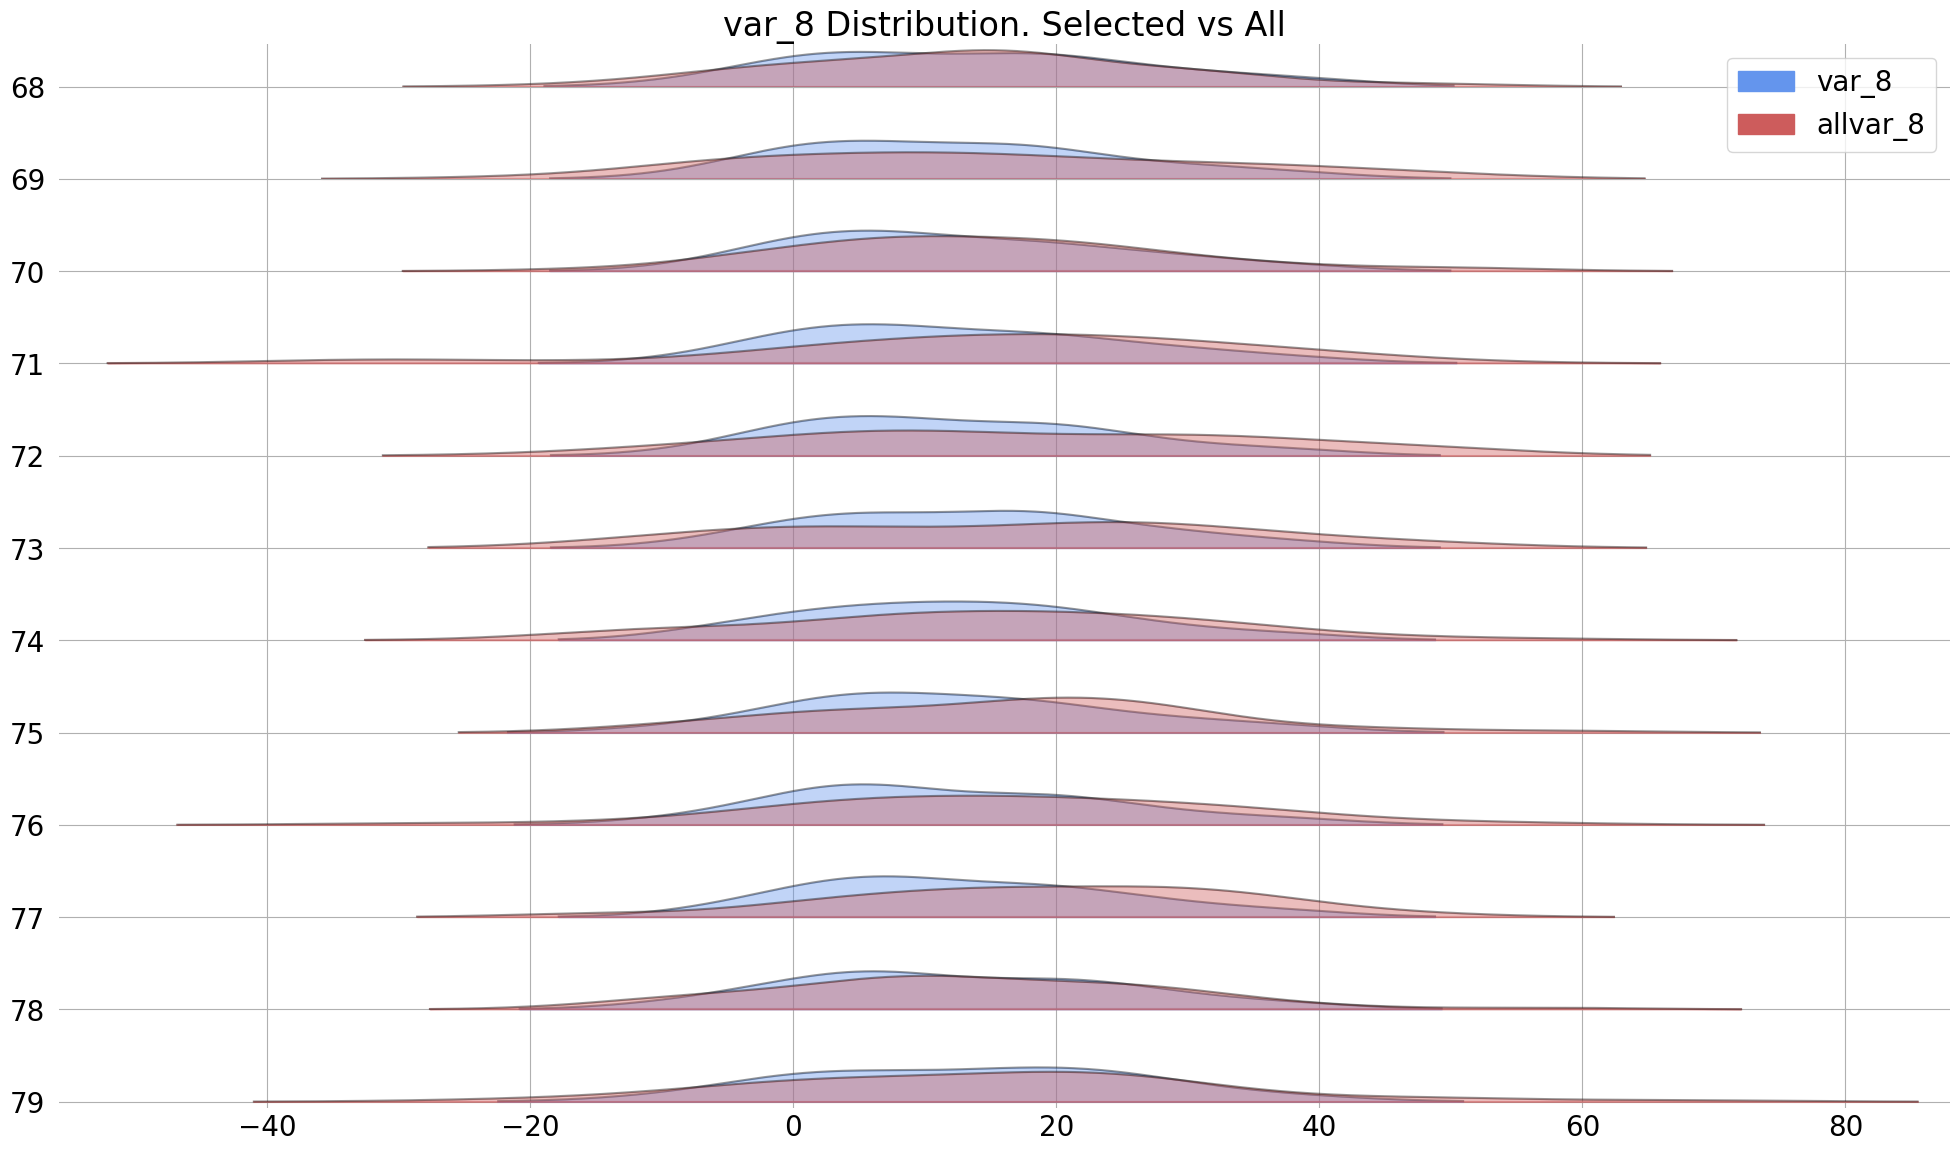

In [13]:
Vis.ridge_plot(eda_resultumdaRAST, vars_to_plot=['var_8'], overlap=0, kind='kde', bins=20, superimpose_sampled_individuals=True, gen_interval=(67,80), gen_label=1)

# Rosenbrock's function

### **UMDA vs EGNA**

In [14]:
import numpy as np
execute_edas = True
init_pop = np.random.uniform(-100, 100, (100, 10))
if execute_edas:
    umda = UMDAc(size_gen=100, max_iter=400, dead_iter=50, n_variables=n_variables, lower_bound=-100, upper_bound=100, init_data=init_pop)
    egna = EGNA(size_gen=100, max_iter=400, dead_iter=50, n_variables=n_variables, lower_bound=-100, upper_bound=100, init_data=init_pop)
    eda_resultumdaROS = umda.minimize(benchmarking.cec14_4, False) #Rosenbrocks's function
    eda_resultegnaROS = egna.minimize(benchmarking.cec14_4, False) #Rosenbrocks's function

IT:  0 	Best cost:  2975.8662679040012
	NFEVALS = 40000 F = 406.1691850255553
	X = [[ -29.26289637   38.75477691 -119.8696534   -22.17700024   39.60703926
  -121.55173473    7.69942816   50.81187594   68.77022152  -33.60418446]]
IT:  0 	Best cost:  2975.8662679040012
	NFEVALS = 40000 F = 404.8447497985847
	X = [[ -37.62267245   45.34615626 -114.39213058  -38.35030301   20.62333833
  -121.60608941    9.37963254   51.38432213   67.21985304  -27.42411132]]


In [15]:
results_dict = {}
results_dict['umda'] = eda_resultumdaROS
results_dict['egna'] = eda_resultegnaROS

In [16]:
for keys in results_dict.keys():
    print( keys )

umda
egna


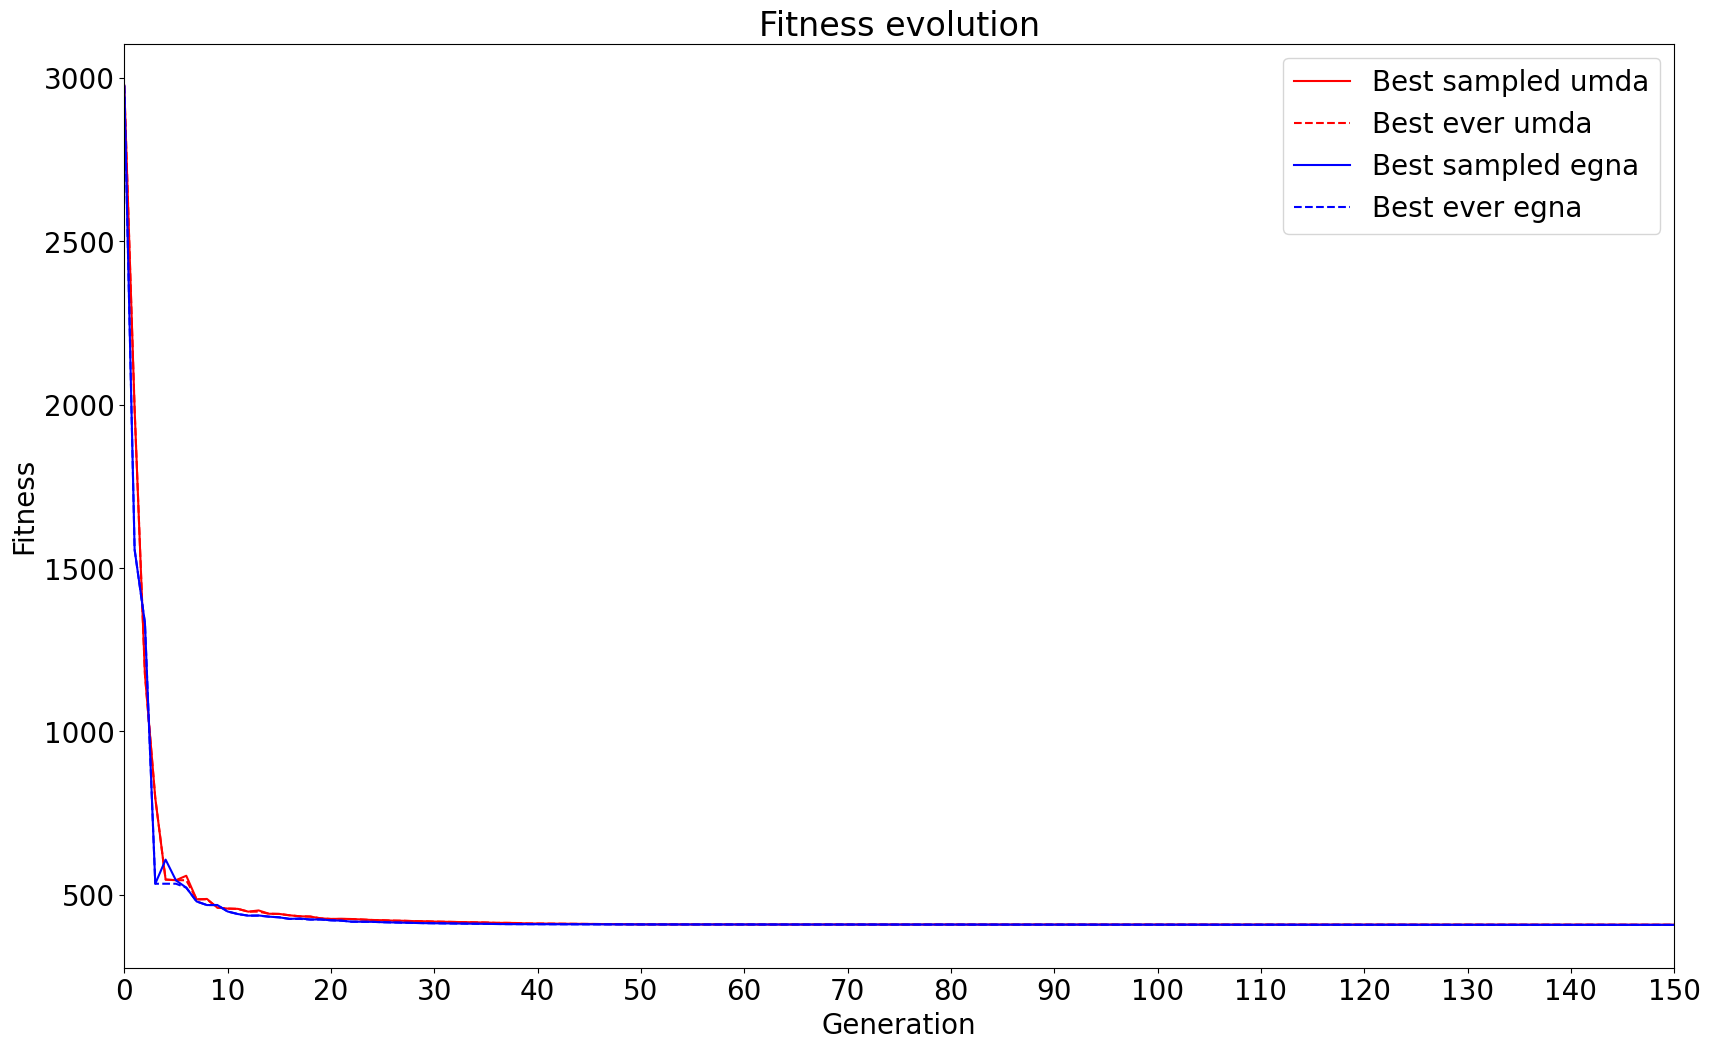

In [17]:
import matplotlib.pyplot as plt
import numpy as np
Vis.fitness_evolution(results_dict, x_lim=(0,150))
#plt.xticks(np.arange(0,15,1));

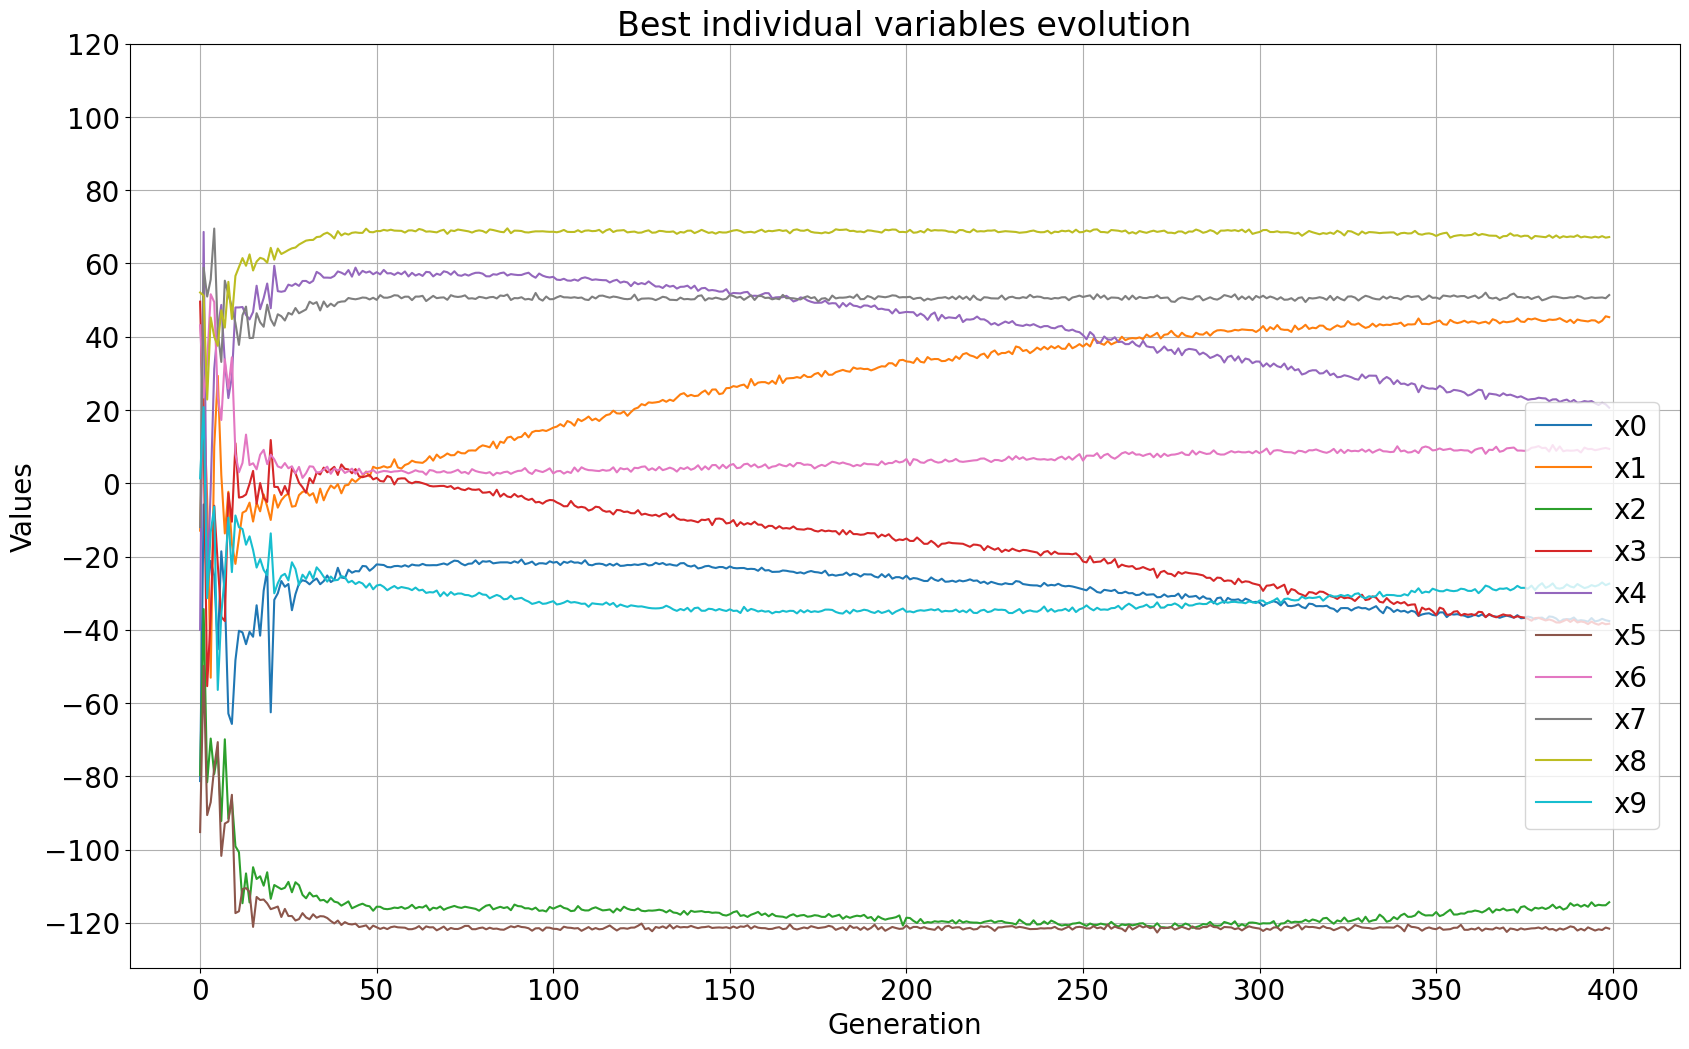

In [18]:
Vis.best_ind_var_ev(eda_resultegnaROS, variables_list=variables)

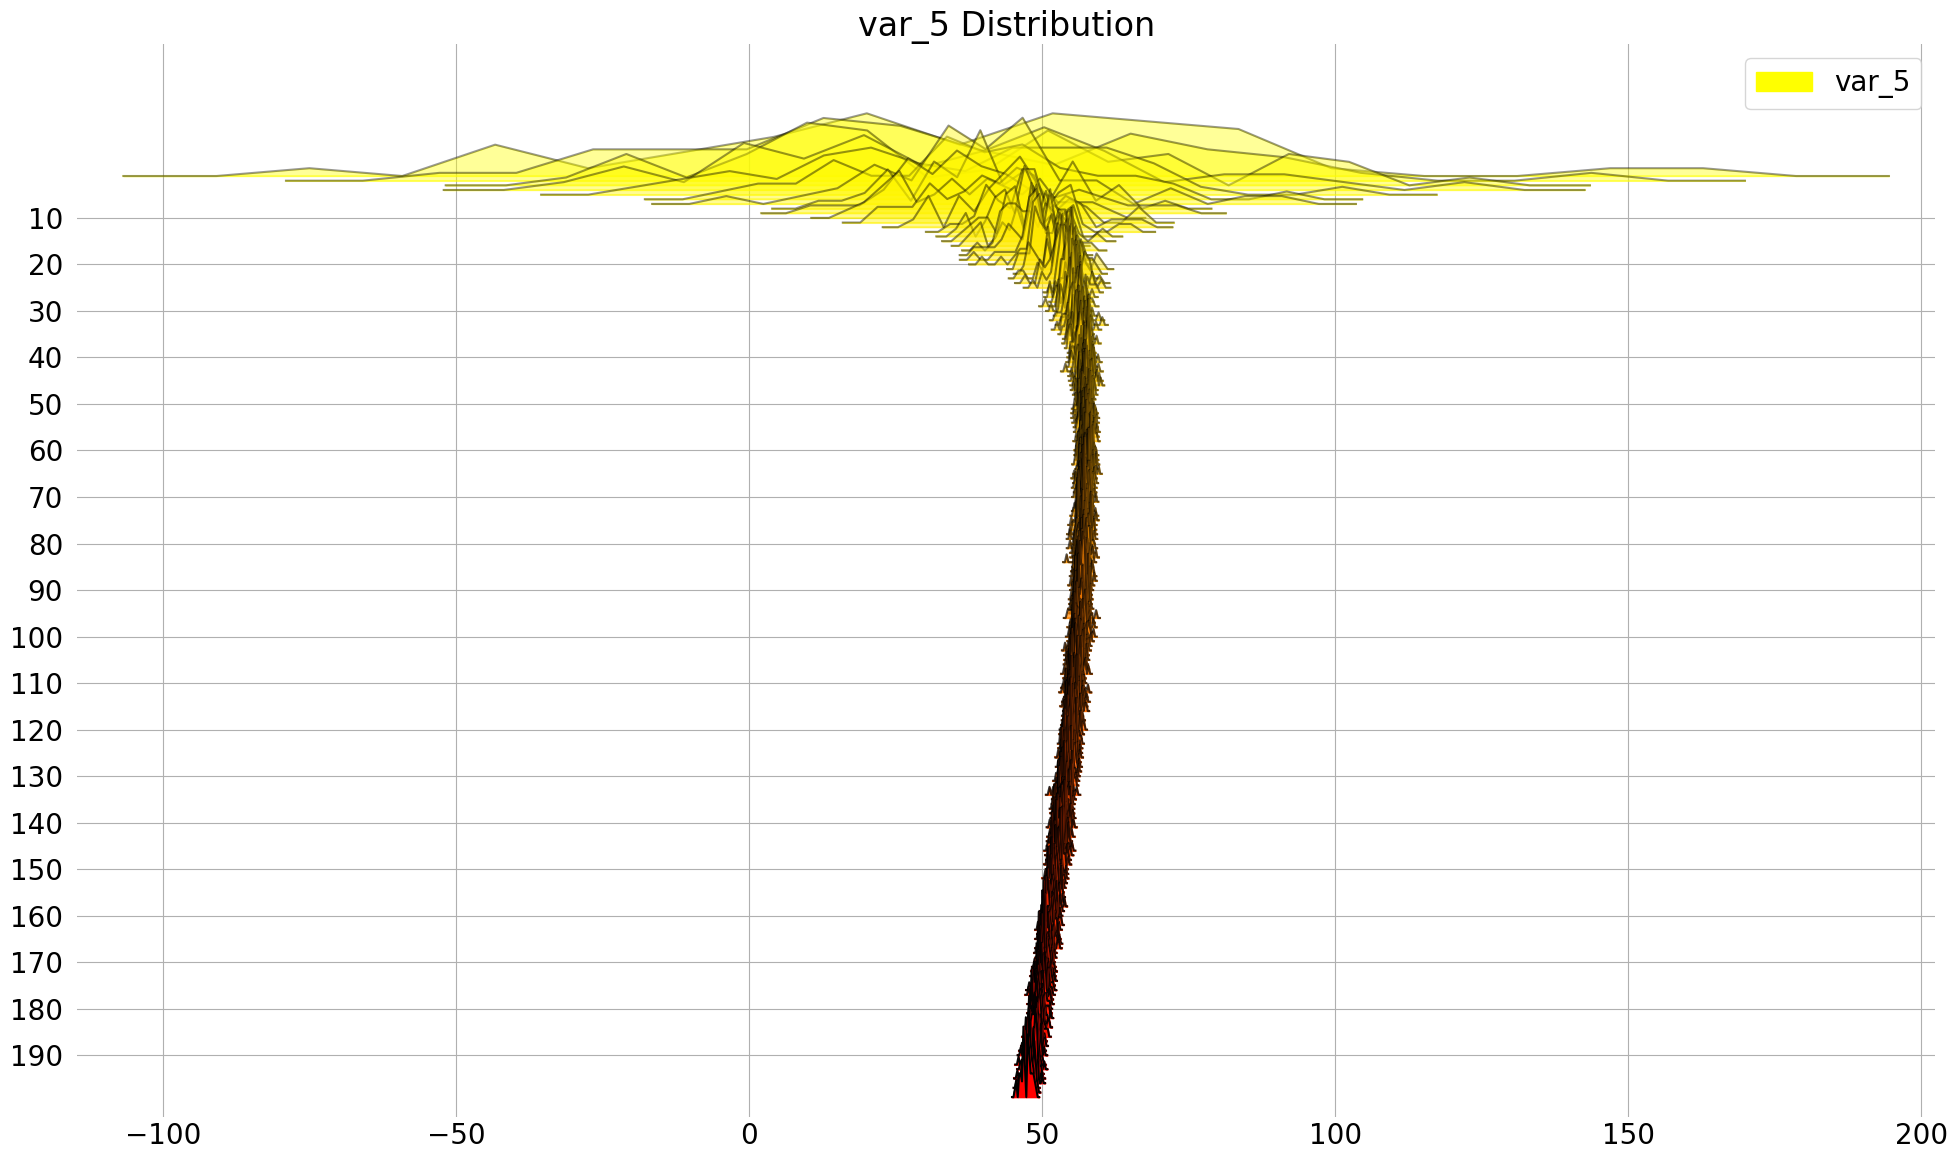

In [19]:
Vis.ridge_plot(eda_resultegnaROS, vars_to_plot=['var_5'], kind='counts', bins=20)

In [20]:
embed = Vis.lmds_calc(results_dict)

In [21]:
Vis.lmds_plot(embed, trajectory_labels=20)

interactive(children=(IntSlider(value=0, description='Generation', layout=Layout(width='100%'), max=398), Outp…

Text(value='', description='Save Loc:', layout=Layout(width='50%'), placeholder='Enter save location here...')

Button(description='Save Plot', style=ButtonStyle())

## plot_bn test

In [22]:
Vis.plot_bn(eda_resultegnaROS)

interactive(children=(IntSlider(value=0, description='Generation', layout=Layout(width='100%'), max=398), Outp…

Text(value='', description='Save Loc:', layout=Layout(width='50%'), placeholder='Enter save location here...')

Button(description='Save Plot', style=ButtonStyle())

No arc appears 40.0% of total iterations


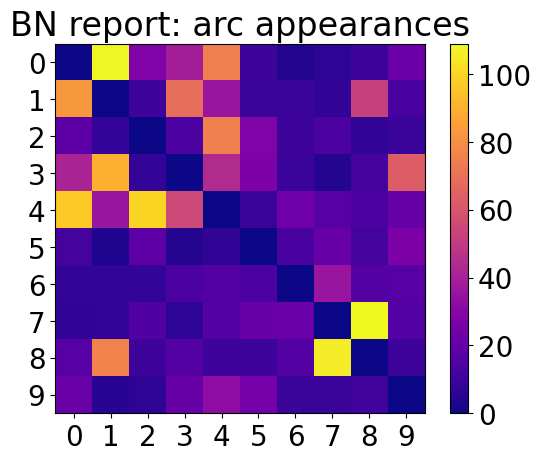

In [23]:
from EDAspy.visualization.plot_bn import bn_report
bn_report(eda_resultegnaROS, print_total_adjacency_matrix=False,importance_threshold=0.4)